# Import

In [ ]:
import os
import shutil
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import os.path, sys
import numpy as np
import random
import csv

from sklearn.metrics import confusion_matrix
import itertools


from tensorflow import keras
from tensorflow.keras import layers, datasets, models, optimizers
from tensorflow.keras.layers import Conv2D, BatchNormalization, Add, Activation, MaxPooling2D, Dropout, Flatten, Dense, AveragePooling2D
from tensorflow.keras import  Input
from tensorflow.keras import Model
from keras.preprocessing.image import ImageDataGenerator
from tqdm.auto import tqdm
import zipfile

import imutils
import numpy as np
from tensorflow.keras.models import load_model
import numpy as np
import gdown

# check GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


# Download **5 classes** - CROPPED - datasets

## PEPE/TEDESCHI dataset

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1u57z2B_Kdwtzly1p0gEwm9bQ60AUeM7j", "./train.zip", quiet=False)
gdown.download("https://drive.google.com/uc?export=donwload&id=1-0uFU0xH2swwQXVE7uGR1tCa7dtkshgd", "./dev.zip", quiet=False)
gdown.download("https://drive.google.com/uc?export=download&id=1-5B1d2UJNQvqY1eFIr7_DT8NngMZNboR", "./test.zip", quiet=False)

In [ ]:
if os.path.exists("./train.zip"):
    print("Extracting the archive")
    with zipfile.ZipFile('./train.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/localdata/")
    with zipfile.ZipFile('./dev.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/localdata/")
    with zipfile.ZipFile('./test.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/localdata/")
    print("Done")
    os.remove("./train.zip")
    os.remove("./dev.zip")
    os.remove("./test.zip")

## BORZILLO/COCCI dataset

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1woyUmAbqVRtpLe9iSj2RdvJbom10cPtk", "./train2.zip", quiet=False)
gdown.download("https://drive.google.com/uc?export=donwload&id=1RwFYlguFN07BazzYGkbVi5MLXV-b2Bb4", "./dev2.zip", quiet=False)
gdown.download("https://drive.google.com/uc?export=donwload&id=1bGe_KeL5y3BMYNvS5CdTBSXRgGB0GGQP", "./test2.zip", quiet=False)

In [ ]:
if os.path.exists("./train2.zip"):
    print("Extracting the archive")
    with zipfile.ZipFile('./train2.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/localdata/train2/")
    with zipfile.ZipFile('./dev2.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/localdata/dev2/")
    with zipfile.ZipFile('./test2.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/localdata/test2/")
    print("Done")
    os.remove("./train2.zip")
    os.remove("./dev2.zip")
    os.remove("./test2.zip")

Final directories in localdata:
* /content/localdata/train
* /content/localdata/train2
* /content/localdata/dev
* /content/localdata/dev2
* /content/localdata/test
* /content/localdata/test2

In [ ]:
def count_in_unzip():
    print("**** TRAIN ****")
    print()
    directory = "./localdata/train"
    print("PEPE/TEDESCHI: ", directory)
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print()
    directory = "./localdata/train2"
    print("BORZILLO/COCCI: ", directory)
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print("\n")
    print("***** DEV *****")
    print()
    directory = "./localdata/dev"
    print("PEPE/TEDESCHI: ", directory)
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print()
    directory = "./localdata/dev2"
    print("BORZILLO/COCCI: ", directory)
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print("\n")
    print("***** TEST ****")
    print()
    directory = "./localdata/test"
    print("PEPE/TEDESCHI: ", directory)
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print()
    directory = "./localdata/test2"
    print("BORZILLO/COCCI: ", directory)
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

In [ ]:
count_in_unzip()

**** TRAIN ****

PEPE/TEDESCHI:  ./localdata/train/train
num classes: 5
center: 16473
down: 17841
left: 18014
right: 17251
up: 16959

BORZILLO/COCCI:  ./localdata/train2
num classes: 5
center: 19697
down: 15920
left: 15915
right: 16012
up: 14634


***** DEV *****

PEPE/TEDESCHI:  ./localdata/dev/dev
num classes: 5
center: 2446
down: 2673
left: 2573
right: 2380
up: 2614

BORZILLO/COCCI:  ./localdata/dev2
num classes: 5
center: 3122
down: 3128
left: 3134
right: 3133
up: 2468


***** TEST ****

PEPE/TEDESCHI:  ./localdata/test/test
num classes: 5
center: 3294
down: 3445
left: 3407
right: 3697
up: 3294

BORZILLO/COCCI:  ./localdata/test2
num classes: 5
center: 3867
down: 2986
left: 3112
right: 3121
up: 3054


# Creation of a big merged 5 classes - CROPPED - dataset (Pepe/Tedeschi + Cocci/Borzillo)

In [ ]:
class MergedDataset():

  def __init__(self, train_path1, train_path2, val_path1, val_path2, test_path1, test_path2, batch_size, target_size, data_aug, shuffle):

    """
      Args:
        - train: path to the train file
        - test: path to the test file
        - batch: batch size
        - target_size: dimension of images
        - data_aug: boolean that we use for data augmentation
    """

    self.train_file1 = train_path1
    self.train_file2 = train_path2

    self.val_file1 = val_path1
    self.val_file2 = val_path2

    self.test_file1 = test_path1
    self.test_file2 = test_path2

    self.batch_size = batch_size
    self.target_size = target_size
    self.data_aug = data_aug
    self.shuffle = shuffle
    self.train_gen1, self.train_gen2, self.val_gen1, self.val_gen2, self.test_gen1, self.test_gen2, \
    self.train_generator, self.val_generator, self.test_generator = self.create_merged_dataset()


  def create_merged_dataset(self):
      """
        creation of the dataset, divided in train, dev and test
      """
      # TRAIN DATA
      if self.data_aug:
          train_data_gen1 = ImageDataGenerator(
              rescale = 1. / 255, # convert from uint8 to float32 in range 0,1
              brightness_range=[0.3,1.5])
          train_data_gen2 = ImageDataGenerator(
              rescale = 1. / 255, # convert from uint8 to float32 in range 0,1
              brightness_range=[0.3,1.5])
      else:
          train_data_gen1 = ImageDataGenerator(rescale = 1. / 255) # convert from uint8 to float32 in range 0,1
          train_data_gen2 = ImageDataGenerator(rescale = 1. / 255) # convert from uint8 to float32 in range 0,1


      train_gen1, train_gen2 = self.create_generators(train_data_gen1, train_data_gen2, self.train_file1, self.train_file2, shuffle=True)
      train_generator = self.merge_generators(train_gen1, train_gen2)

      # VALIDATION DATA
      val_data_gen1 = ImageDataGenerator(rescale = 1. / 255)
      val_data_gen2 = ImageDataGenerator(rescale = 1. / 255)

      val_gen1, val_gen2 = self.create_generators(val_data_gen1, val_data_gen2, self.val_file1, self.val_file2, self.shuffle)
      val_generator = self.merge_generators(val_gen1, val_gen2)

      # TEST DATA
      test_data_gen1 = ImageDataGenerator(rescale = 1. / 255)
      test_data_gen2 = ImageDataGenerator(rescale = 1. / 255)

      test_gen1, test_gen2 = self.create_generators(test_data_gen1, test_data_gen2, self.test_file1, self.test_file2, self.shuffle)
      test_generator = self.merge_generators(test_gen1, test_gen2)

      return train_gen1, train_gen2, val_gen1, val_gen2, test_gen1, test_gen2, train_generator, val_generator, test_generator


  def create_generators(self, data_gen1, data_gen2, file1, file2, shuffle):
      generator1 = data_gen1.flow_from_directory(
          directory=file1,
          target_size=self.target_size,
          color_mode="rgb",
          batch_size=self.batch_size,
          class_mode="categorical",
          shuffle=shuffle,
      )
      generator2 = data_gen2.flow_from_directory(
          directory=file2,
          target_size=self.target_size,
          color_mode="rgb",
          batch_size=self.batch_size,
          class_mode="categorical",
          shuffle=shuffle,
      )
      return generator1, generator2

  def merge_generators(self, generator1, generator2):

      while True:
        x1, y1 = generator1.next()
        x2, y2 = generator2.next()

        # Concatenate the data from both generators
        x = np.concatenate((x1, x2))
        y = np.concatenate((y1, y2))

        # Create a random permutation of indices
        indices = np.random.permutation(len(x))
        x = x[indices]
        y = y[indices]

        for i in range(0, len(x), self.batch_size):
            yield x[i:i+self.batch_size], y[i:i+self.batch_size]


In [ ]:
train_path1 = "/content/localdata/train/"
train_path2 =  "/content/localdata/train2/"
dev_path1 = "/content/localdata/dev/"
dev_path2 =  "/content/localdata/dev2/"
test_path1 = "/content/localdata/test/"
test_path2 =  "/content/localdata/test2/"

data_aug = False
target_size =(128, 128)
batch_size = 64

dataset = MergedDataset(train_path1, train_path2, dev_path1, dev_path2, test_path1, test_path2, batch_size, target_size, data_aug, True)

train_gen1, train_gen2, val_gen1, val_gen2, test_gen1, test_gen2, train_generator, valid_generator, test_generator = dataset.train_gen1, dataset.train_gen2, dataset.val_gen1, dataset.val_gen2, dataset.test_gen1, dataset.test_gen2, dataset.train_generator, dataset.val_generator, dataset.test_generator

Found 86538 images belonging to 5 classes.
Found 82178 images belonging to 5 classes.
Found 12686 images belonging to 5 classes.
Found 14985 images belonging to 5 classes.
Found 17137 images belonging to 5 classes.
Found 16140 images belonging to 5 classes.


In [ ]:
# TRAIN CHECK ..................................................................................................
print("TRAIN DATA: ")
num_samples1 = train_gen1.n
num_samples2 = train_gen2.n
print("Number of samples in Pepe/Tedeschi dataset: ", num_samples1)
print("Number of samples in Borzillo/Cocci dataset: ", num_samples2)
num_samples_train = num_samples1+num_samples2

# check that the number of classes is equal for both merged dataset
num_classes1 = train_gen1.num_classes
num_classes2 = train_gen2.num_classes
assert(num_classes1 == num_classes2)
num_classes = num_classes1

# check that the input shape is equal for both merged dataset
input_shape1 = train_gen1.image_shape
input_shape2 = train_gen2.image_shape
assert(input_shape1 == input_shape2)
input_shape = input_shape1

# check that the class names are equal for both merged dataset
classnames1 = [k for k,v in train_gen1.class_indices.items()]
classnames2 = [k for k,v in train_gen2.class_indices.items()]
assert(classnames1 == classnames2)
classnames = classnames1

print("Classes:\n" , classnames1)
print("\n")
# VAL CHECK ..................................................................................................
print("VALIDATION DATA: ")
num_samples1 = val_gen1.n
num_samples2 = val_gen2.n
print("Number of samples in Pepe/Tedeschi dataset: ", num_samples1)
print("Number of samples in Borzillo/Cocci dataset: ", num_samples2)
num_samples_val = num_samples1+num_samples2

# check that the number of classes is equal for both merged dataset
num_classes1 = val_gen1.num_classes
num_classes2 = val_gen2.num_classes
assert(num_classes1 == num_classes2)

# check that the input shape is equal for both merged dataset
input_shape1 = val_gen1.image_shape
input_shape2 = val_gen2.image_shape
assert(input_shape1 == input_shape2)

# check that the class names are equal for both merged dataset
classnames1 = [k for k,v in val_gen1.class_indices.items()]
classnames2 = [k for k,v in val_gen2.class_indices.items()]
assert(classnames1 == classnames2)

print("Classes:\n" , classnames1)
print("\n")

# TEST CHECK ..................................................................................................
print("TEST DATA: ")
num_samples1 = test_gen1.n
num_samples2 = test_gen2.n
print("Number of samples in Pepe/Tedeschi dataset: ", num_samples1)
print("Number of samples in Borzillo/Cocci dataset: ", num_samples2)
num_samples_test = num_samples1+num_samples2

# check that the number of classes is equal for both merged dataset
num_classes1 = test_gen1.num_classes
num_classes2 = test_gen2.num_classes
assert(num_classes1 == num_classes2)

# check that the input shape is equal for both merged dataset
input_shape1 = test_gen1.image_shape
input_shape2 = test_gen2.image_shape
assert(input_shape1 == input_shape2)

# check that the class names are equal for both merged dataset
classnames1 = [k for k,v in test_gen1.class_indices.items()]
classnames2 = [k for k,v in test_gen2.class_indices.items()]
assert(classnames1 == classnames2)

print("Classes:\n" , classnames1)

TRAIN DATA: 
Number of samples in Pepe/Tedeschi dataset:  86538
Number of samples in Borzillo/Cocci dataset:  82178
Classes:
 ['center', 'down', 'left', 'right', 'up']


VALIDATION DATA: 
Number of samples in Pepe/Tedeschi dataset:  12686
Number of samples in Borzillo/Cocci dataset:  14985
Classes:
 ['center', 'down', 'left', 'right', 'up']


TEST DATA: 
Number of samples in Pepe/Tedeschi dataset:  17137
Number of samples in Borzillo/Cocci dataset:  16140
Classes:
 ['center', 'down', 'left', 'right', 'up']


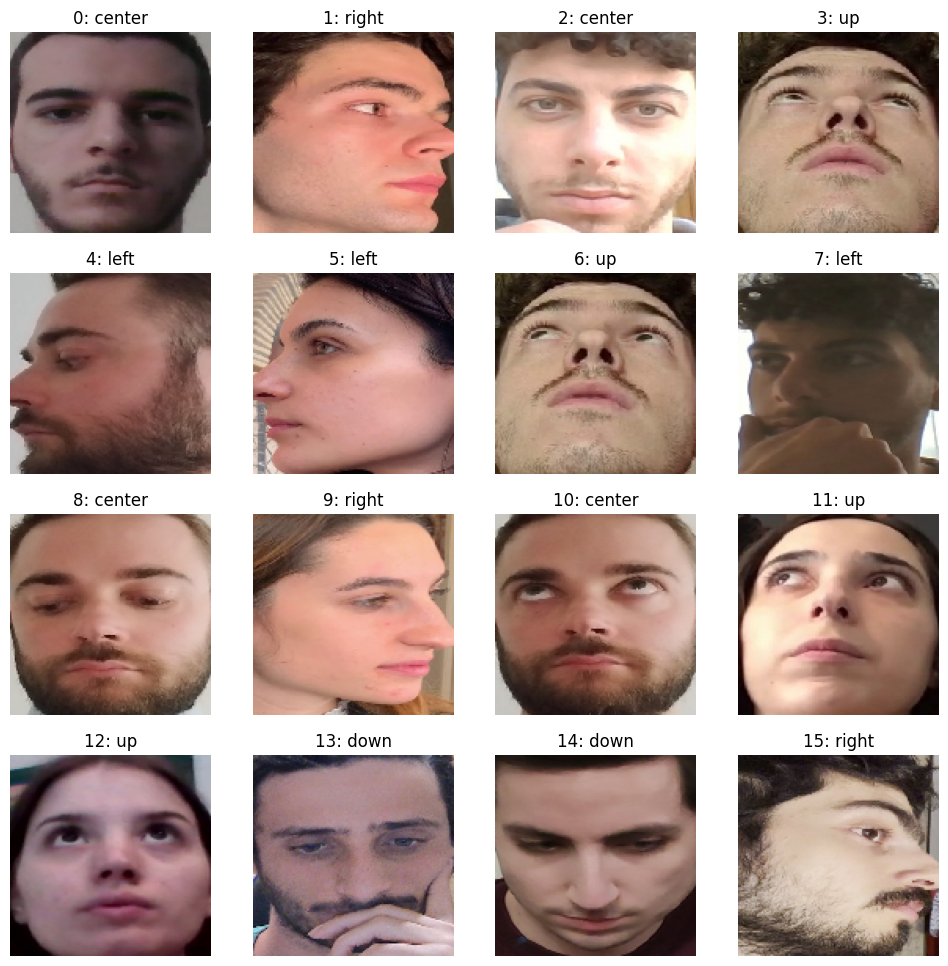

In [ ]:
def show_batch(image_batch, label_batch):

  """
    Args:
      - image_batch: batch of images (not labels)
      - label_batch: batch of labels
  """

  plt.figure(figsize=(12,12))
  for n in range(16):
      ax = plt.subplot(4,4,n+1)
      plt.imshow(image_batch[n])
      idx = np.where(label_batch[n] == 1)[0][0]
      plt.title(str(n) + ": " + classnames1[idx])
      plt.axis('off')

image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

# TASK 1: Attention detection based on facial orientation

## Model

In [ ]:
class HParams():
  def __init__(self, input_shape, num_classes, lr, model_name, brightness, shift):

    """
      Args:
        - input_shape: shape of images
        - num_classes: number of classes
        - lr: learning rate
        - model_name: name of model
    """
    self.brightness = brightness
    self.shift = shift
    self.shape = input_shape
    self.num_classes = num_classes
    self.lr = lr
    self.optimizer = optimizers.Adam(self.lr)
    self.loss_fn = 'categorical_crossentropy'
    self.metrics = ['accuracy']
    self.drop_rate = 0.5
    self.n_res_net_blocks = 3
    self.n_paths = 4
    self.model_name = model_name #allowed values: Xception, ResNet, ResNeXt, VGG16, VGG19

params = HParams(input_shape, num_classes, 0.00001, "VGG16", True, False)

In [ ]:
class PretrainedModel():
  def __init__(self,name, trainable):

    """
      Args:
        - name: name of pretrained model
        - trainable: boolean used to indicate if layers of pretrained model are freezed or trained
    """

    self.name = name
    self.trainable = trainable
    self.model = self.build_model()

  def build_model(self):

    if self.name == "Xception":
      base_model = keras.applications.Xception(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )
    elif self.name == "ResNet":
      base_model = keras.applications.ResNet152V2(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )
    elif self.name == "VGG16":
      base_model = keras.applications.VGG16(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )
    else:
      base_model = keras.applications.VGG19(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )

    base_model.trainable = self.trainable
    inputs = keras.Input(shape=input_shape)

    # We freeze pretrained model weigths
    x = base_model(inputs, training=True)

    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)

    x = keras.layers.Dense(1024, activation='relu')(x)
    x = keras.layers.Dropout(params.drop_rate)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(params.num_classes, activation="softmax")(x)
    model_5_classes = keras.Model(inputs, outputs, name=params.model_name)
    model_5_classes.compile(loss=params.loss_fn, optimizer=params.optimizer, metrics=params.metrics)

    return model_5_classes

In [ ]:
model_5_classes = PretrainedModel(params.model_name, True).model

58889256/58889256 [==============================] - 4s 0us/step


## Training

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from datetime import datetime
data_aug = False
batch_size = 64
nome_prova = f"{params.model_name}{input_shape}_lr{params.lr}_drop{params.drop_rate}_data_aug_{data_aug}_brightness_{params.brightness}_shift_{params.shift}_FACE_DETECTION_{datetime.now().strftime('%Y%m_%d_%H_%M_%S')}"

model_path = "/content/training_5_classes/checkpoints/"+nome_prova+"/"
logs_path = "/content/training_5_classes/tensorboard_logs/"+nome_prova

if not os.path.exists(model_path):
  os.makedirs(model_path)

if not os.path.exists(logs_path):
  os.makedirs(logs_path)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=model_path+'model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir=logs_path)
]

history = model_5_classes.fit(train_generator, steps_per_epoch = num_samples_train/batch_size, epochs=3, verbose=1, validation_data=valid_generator, validation_steps= num_samples_val/batch_size, callbacks=my_callbacks)


Epoch 1/3
2636/2636 [==============================] - 1314s 489ms/step - loss: 0.0579 - accuracy: 0.9797 - val_loss: 0.5521 - val_accuracy: 0.8936
Epoch 2/3
2636/2636 [==============================] - 1242s 471ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.4447 - val_accuracy: 0.9082
Epoch 3/3
2636/2636 [==============================] - 1196s 454ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.6907 - val_accuracy: 0.9089


## Test

In [ ]:
loss, acc = model_5_classes.evaluate(test_generator, steps = num_samples_test/batch_size, verbose=1)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

519/519 [==============================] - 148s 285ms/step - loss: 0.4418 - accuracy: 0.8999
Test loss: 0.441760
Test accuracy: 0.899874


### Saving all the **test** images clasified as "center"...

NB.

**class_to_index** is a dictionary that maps class names to their corresponding class indices.

 For example, class_to_index = {'center': 0, 'up': 1, 'down': 2, 'right': 3, 'left': 4}

In [ ]:
def saving_center_classified_samples(generator1, generator2, model=model_5_classes):
  class_to_index = {'center': 0, 'up': 1, 'down': 2, 'right': 3, 'left': 4}

  # in order to get class probabilities for training and validation samples
  pred_probs = model.predict(generator1)

  # in order to get the predicted classes for training and validation samples
  pred_classes = np.argmax(pred_probs, axis=1)

  # to get the indices of training and validation samples classified as "center"
  center_indices = np.where(pred_classes == class_to_index['center'])[0]

  center_filenames1 = [generator1.filenames[i] for i in center_indices]

  # in order to get class probabilities for training and validation samples
  pred_probs = model.predict(generator2)

  # in order to get the predicted classes for training and validation samples
  pred_classes = np.argmax(pred_probs, axis=1)

  # to get the indices of training and validation samples classified as "center"
  center_indices = np.where(pred_classes == class_to_index['center'])[0]

  center_filenames2 = [generator2.filenames[i] for i in center_indices]


  return center_filenames1+center_filenames2

In [ ]:
test_center_filenames = saving_center_classified_samples(test_gen1, test_gen2, model_5_classes)

253/253 [==============================] - 43s 171ms/step


### Show batch predict test

In [ ]:
dataset = MergedDataset(train_path1, train_path2, dev_path1, dev_path2, test_path1, test_path2, batch_size, target_size, data_aug, True)

_, _, _, _, _, _, _, _, test_generator = dataset.train_gen1, dataset.train_gen2, dataset.val_gen1, dataset.val_gen2, dataset.test_gen1, dataset.test_gen2, dataset.train_generator, dataset.val_generator, dataset.test_generator

Found 86538 images belonging to 5 classes.
Found 82178 images belonging to 5 classes.
Found 12686 images belonging to 5 classes.
Found 14985 images belonging to 5 classes.
Found 17137 images belonging to 5 classes.
Found 16140 images belonging to 5 classes.


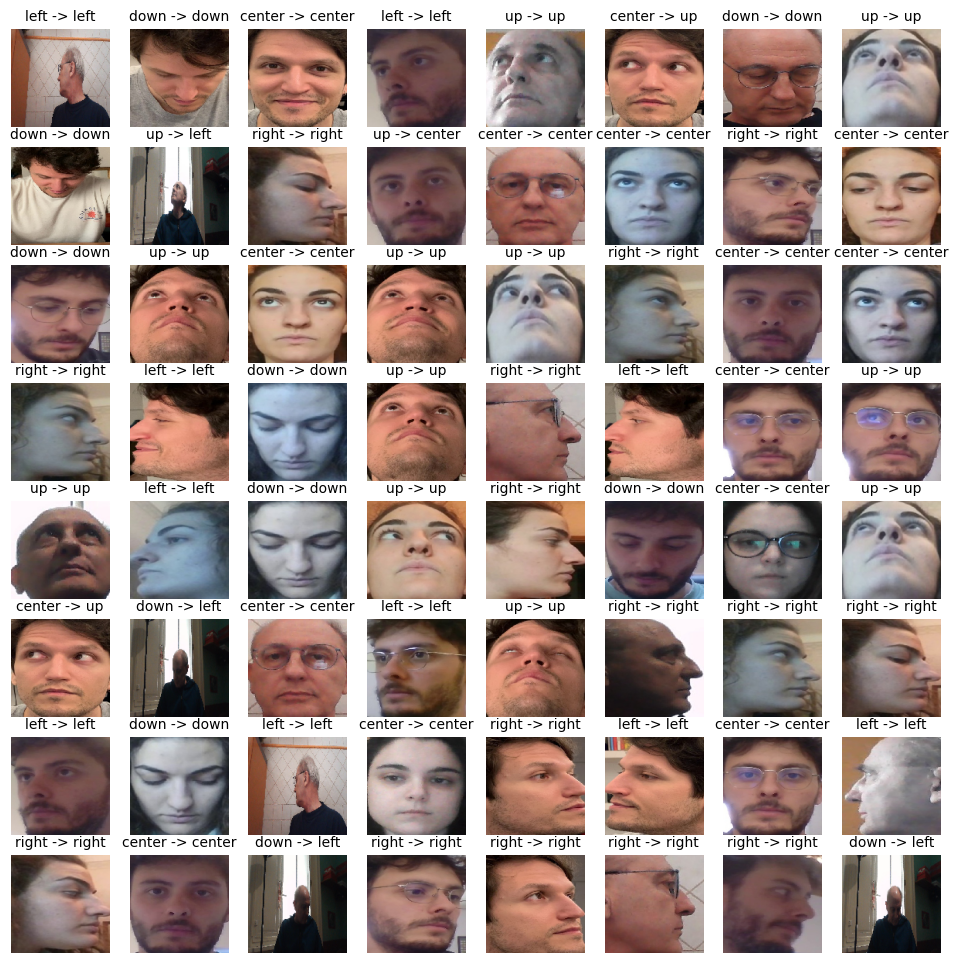

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(12,12))
  for n in range(64):
      ax = plt.subplot(8,8,n+1)
      plt.imshow(image_batch[n])
      pred = model_5_classes(image_batch)
      idx = np.where(label_batch[n] == 1)[0][0]
      idx_pred = pred[n].numpy().argmax()
      plt.title(f"{classnames[idx]} -> {classnames[idx_pred]}", fontsize=10)
      plt.axis('off')

image_batch, label_batch = next(test_generator)
show_batch(image_batch, label_batch)

### Confusion Matrix plot



In [ ]:
dataset = MergedDataset(train_path1, train_path2, dev_path1, dev_path2, test_path1, test_path2, batch_size, target_size, data_aug, shuffle=False)

_, _, _, _, test_gen1, test_gen2, _, _, test_generator = dataset.train_gen1, dataset.train_gen2, dataset.val_gen1, dataset.val_gen2, dataset.test_gen1, dataset.test_gen2, dataset.train_generator, dataset.val_generator, dataset.test_generator

Found 86538 images belonging to 5 classes.
Found 82178 images belonging to 5 classes.
Found 12686 images belonging to 5 classes.
Found 14985 images belonging to 5 classes.
Found 17137 images belonging to 5 classes.
Found 16140 images belonging to 5 classes.


In [ ]:
predictions1 = model_5_classes.predict(x=test_gen1, steps=len(test_gen1), verbose=1)
predictions2 = model_5_classes.predict(x=test_gen2, steps=len(test_gen2), verbose=1)
predictions = np.concatenate((predictions1,predictions2), axis=0)

253/253 [==============================] - 45s 179ms/step


In [ ]:
test_generator_classes = []
for i in test_gen1.classes:
  test_generator_classes.append(i)
for i in test_gen2.classes:
  test_generator_classes.append(i)
test_generator_classes = np.asarray(test_generator_classes)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

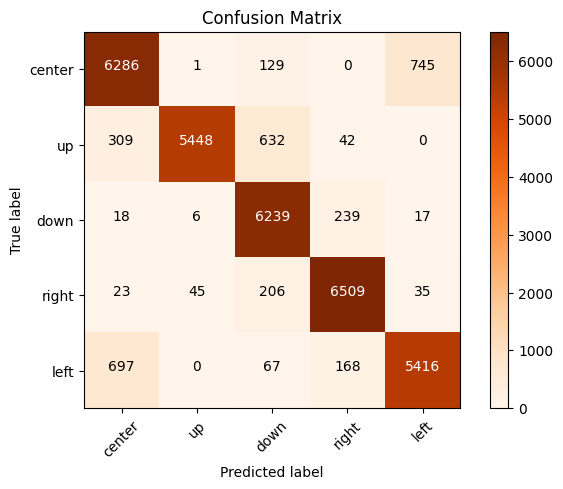

In [ ]:
cm = confusion_matrix(y_true=test_generator_classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['center', 'up', 'down', 'right', 'left']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Loading of cropped eyes dataset

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1WyIfCNZJJPf4lHScmhEsBLfHJXBszRbC", "./train2.zip", quiet=False)
gdown.download("https://drive.google.com/uc?export=donwload&id=1-gFtqJvQQztHeaW0EBt_waKevQnf7s0m", "./dev2.zip", quiet=False)
gdown.download("https://drive.google.com/uc?export=download&id=1npo7nfTo5Fj55S-NIOd394NGcdS2tlXq", "./test2.zip", quiet=False)

In [ ]:
if os.path.exists("./train2.zip"):
    print("Extracting the archive")
    with zipfile.ZipFile('./train2.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/eyes/train2/")
    with zipfile.ZipFile('./dev2.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/eyes/dev2/")
    with zipfile.ZipFile('./test2.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/eyes/test2/")
    print("Done")
    os.remove("./train2.zip")
    os.remove("./dev2.zip")
    os.remove("./test2.zip")

In [ ]:
def count_in_unzip():
    print("***************")
    print("**** TRAIN ****")
    print("***************")
    print()
    directory = "./eyes/train2/train2"
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print()
    print("***************")
    print("***** DEV *****")
    print("***************")
    print()
    directory = "./eyes/dev2/dev2"
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

    print()
    print("***************")
    print("***** TEST ****")
    print("***************")
    print()
    directory = "./eyes/test2/test2"
    l = os.listdir(directory)
    print(f"num classes: {len(l)}")
    l.sort()
    for c in l:
        print(c+": "+str(len(os.listdir(directory+"/"+c))))

In [ ]:
count_in_unzip()

***************
**** TRAIN ****
***************

num classes: 2
center_0: 16506
center_1: 19027

***************
***** DEV *****
***************

num classes: 2
center_0: 3122
center_1: 2445

***************
***** TEST ****
***************

num classes: 2
center_0: 3119
center_1: 3902


# Test samples classified as CENTER

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=1E38vwyttfS3f-vNUT5SfH2yfoisw3ns7", "./centers.zip", quiet=False)

In [ ]:
if os.path.exists("./centers.zip"):
    print("Extracting the archive")
    with zipfile.ZipFile('./centers.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/")
    print("Done")
    os.remove("./centers.zip")

In [ ]:
path_csv = "/content/centers.csv"

In [ ]:
def extract_column_data(file_path, column_index):
    with open(file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        column_data = [row[column_index] for row in reader]
    return column_data

imgs_name = extract_column_data(path_csv, 0)
imgs_label = extract_column_data(path_csv, 1)

In [ ]:
def division(center_filenames,folder2_path):
    for ff in center_filenames:
        f = ff.split("/")[1]
        if f in imgs_name:
            label = imgs_label[imgs_name.index(f)]
            final_folder2_path = f"{folder2_path}/{label}/"
            if "frame" in f:
                final_folder_path = f"/content/localdata/test/center/{f}"
            else:
                final_folder_path = f"/content/localdata/test2/center/{f}"
            try:
                shutil.copy2(final_folder_path, final_folder2_path)
            except:
                pass

In [ ]:
os.mkdir("/content/pipeline_testing")
os.mkdir("/content/pipeline_testing/test")
os.mkdir("/content/pipeline_testing/test/center_0")
os.mkdir("/content/pipeline_testing/test/center_1")

In [ ]:
division(test_center_filenames,"/content/pipeline_testing/test/")

# APPLICATION OF EYE DETECTION FUNCTION

In [ ]:
import imutils
from imutils import face_utils
import dlib

In [ ]:
gdown.download("https://drive.google.com/uc?export=download&id=10y4WktV4uOTPa14avxDyxUMgF4t-k-DX", "./shape_predictor_68_face_landmarks.zip", quiet=False)

In [ ]:
if os.path.exists("./shape_predictor_68_face_landmarks.zip"):
    print("Extracting the archive")
    with zipfile.ZipFile('./shape_predictor_68_face_landmarks.zip', 'r') as zip_ref:
      zip_ref.extractall("/content/")
    print("Done")
    os.remove("./shape_predictor_68_face_landmarks.zip")

In [ ]:
path_predictor = "/content/shape_predictor_68_face_landmarks.dat"

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(path_predictor)

In [ ]:
def eyes(img_path,img_name,destination_folder):
	# load the input image, resize it, and convert it to grayscale
	image = cv2.imread(img_path)
	image = imutils.resize(image, width=500)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	rects = detector(gray, 0)


	eyes = []
	# loop over the face detections
	for (i, rect) in enumerate(rects):
		# determine the facial landmarks for the face region, then convert the landmark (x, y)-coordinates to a NumPy array
		shape = predictor(gray, rect)
		shape = face_utils.shape_to_np(shape)
		# loop over the face parts individually
		focus_on = [("right_eye",face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]),("left_eye",face_utils.FACIAL_LANDMARKS_IDXS["left_eye"])]
		for (name, (i, j)) in focus_on:
			# clone the original image so we can draw on it, then display the name of the face part on the image
			clone = image.copy()
			cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
				0.7, (0, 0, 255), 2)
			# loop over the subset of facial landmarks, drawing the specific face part
			for (x, y) in shape[i:j]:
				cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
			# extract the ROI of the face region as a separate image
			(x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
			# print(x, y, w, h)
			roi = image[y:y + h, x:x + w]
			roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
			eyes.append((roi,[x,y,h,w]))

		# visualize all facial landmarks with a transparent overlay
		output = face_utils.visualize_facial_landmarks(image, shape)

	if eyes == []:
		return
	eye_1 = eyes[0][1] #[x,y,h,w]
	eye_2 = eyes[1][1]
	if eye_1[0] > eye_2[0]: # x1 > x2
		x = eye_2[0]
	else:
		x = eye_1[0]

	if eye_1[1] > eye_2[1]: # y1 > y2
		y = eye_2[1]
	else:
		y = eye_1[1]

	if eye_1[0] + eye_1[3] > eye_2[0] + eye_2[3]: # x1+w1 > x2+w2
		xw = eye_1[0] + eye_1[3]
	else:
		xw = eye_2[0] + eye_2[3]

	if eye_1[1] + eye_1[2] > eye_2[1] + eye_2[2]: #y1+h1 > y2+h2
		yh = eye_1[1] + eye_1[2]
	else:
		yh = eye_2[1] + eye_2[2]

	eyes = image[y:yh, x:xw]
	eyes = imutils.resize(eyes, width=250, inter=cv2.INTER_CUBIC)
	cv2.imwrite(f"{destination_folder}/{img_name}",eyes)

In [ ]:
os.mkdir("/content/eyes/pipeline_test")
os.mkdir("/content/eyes/pipeline_test/center_1")
os.mkdir("/content/eyes/pipeline_test/center_0")

In [ ]:
from_folder = "/content/pipeline_testing/test/center_1"
to_folder = "/content/eyes/pipeline_test/center_1"
list_imgs = os.listdir(from_folder)
for img in tqdm(list_imgs):
    eyes(f"{from_folder}/{img}",img,to_folder)

from_folder = "/content/pipeline_testing/test/center_0"
to_folder = "/content/eyes/pipeline_test/center_0"
list_imgs = os.listdir(from_folder)
for img in tqdm(list_imgs):
    eyes(f"{from_folder}/{img}",img,to_folder)

  0%|          | 0/2606 [00:00<?, ?it/s]

  0%|          | 0/588 [00:00<?, ?it/s]

# Dataset class

In [ ]:
class Dataset2Classes():

  def __init__(self, train_path, val_path, test_path, batch_size, target_size, data_aug, shuffle):

    """
      Args:
        - train: path to the train file
        - test: path to the test file
        - batch: batch size
        - target_size: dimension of images
        - data_aug: boolean that we use for data augmentation
    """

    self.train_file = train_path
    self.val_file = val_path
    self.test_file = test_path
    self.batch_size = batch_size
    self.target_size = target_size
    self.data_aug = data_aug
    self.shuffle = shuffle
    self.train_generator, self.val_generator, self.test_generator = self.create_dataset()

  def create_dataset(self):
      """
        creation of the dataset, divided in train, dev and test
      """

      if self.data_aug:
          train_data = ImageDataGenerator(
              rescale = 1. / 255, # convert from uint8 to float32 in range 0,1
              brightness_range=[0.3,1.5]
          )
      else:
          train_data = ImageDataGenerator(
              rescale = 1. / 255, # convert from uint8 to float32 in range 0,1
          )

      train_generator = train_data.flow_from_directory(
          directory=self.train_file,
          target_size=self.target_size,
          color_mode="rgb",
          batch_size=self.batch_size,
          class_mode='binary',
          shuffle=True,
      )

      valid_data = ImageDataGenerator(
          rescale = 1. / 255)

      val_generator = valid_data.flow_from_directory(
          directory=self.val_file,
          target_size=self.target_size,
          batch_size=self.batch_size,
          color_mode="rgb",
          class_mode='binary',
          shuffle=self.shuffle) # set as validation data

      test_datagen = ImageDataGenerator(
          rescale = 1. / 255)

      test_generator = test_datagen.flow_from_directory(
          directory=self.test_file,
          target_size=self.target_size,
          color_mode="rgb",
          batch_size=self.batch_size,
          class_mode='binary',
          shuffle=self.shuffle)


      return train_generator, val_generator, test_generator

In [ ]:
data_aug = False
target_size =(50, 170)
batch_size = 64

train_path = "/content/eyes/train2/train2/"
val_path = "/content/eyes/dev2/dev2/"
test_path = "/content/eyes/test2/test2/"

dataset = Dataset2Classes(train_path, val_path, test_path, batch_size, target_size, data_aug, True)
train_generator, valid_generator, test_generator = dataset.train_generator, dataset.val_generator, dataset.test_generator

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape
classnames = [k for k,v in train_generator.class_indices.items()]

print("\nClasses:\n%r" %classnames)

Found 35533 images belonging to 2 classes.
Found 5567 images belonging to 2 classes.
Found 7021 images belonging to 2 classes.

Classes:
['center_0', 'center_1']


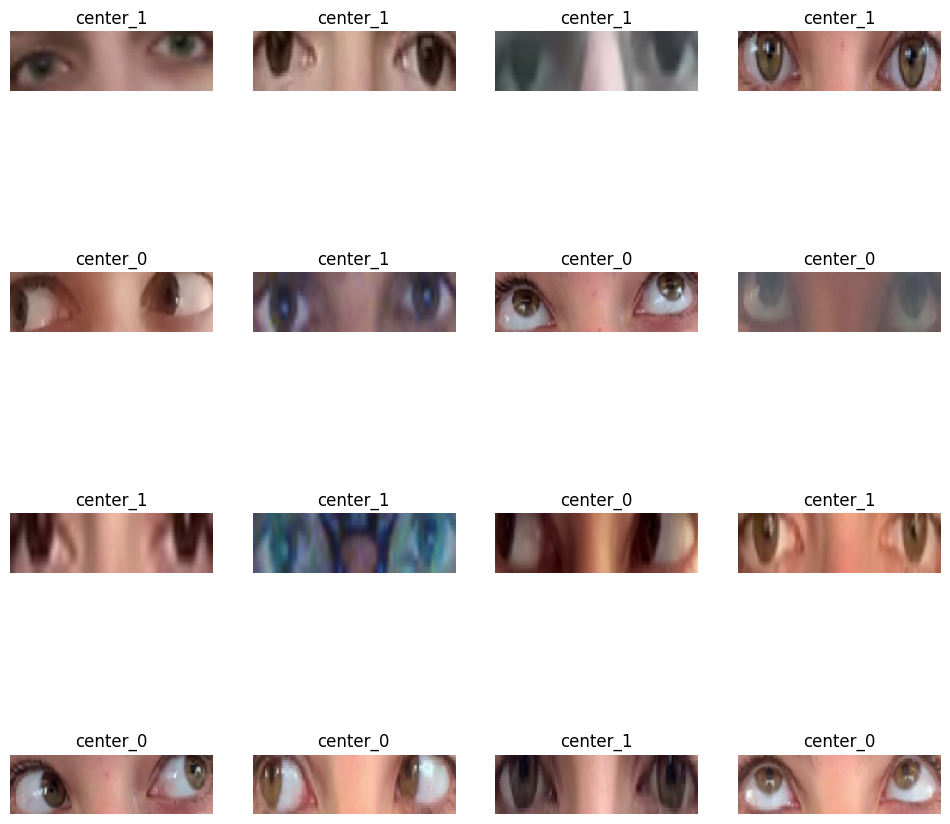

In [ ]:
def show_batch(image_batch, label_batch):

  """
    Args:
      - image_batch: batch of images (not labels)
      - label_batch: batch of labels
  """
  plt.figure(figsize=(12,12))
  for n in range(16):
      ax = plt.subplot(4,4,n+1)
      plt.imshow(image_batch[n])
      if label_batch[n] == 1:
        plt.title(classnames[1])
        plt.axis('off')
      else:
        plt.title(classnames[0])
        plt.axis('off')

image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch)

# TASK 2: Attention detection based on EYE ORIENTATION with CROPPED dataset

## Model

In [ ]:
class HParams():
  def __init__(self, input_shape, num_classes, lr, model_name, brightness, shift):

    """
      Args:
        - input_shape: shape of images
        - num_classes: number of classes
        - lr: learning rate
        - model_name: name of model
    """
    self.brightness = brightness
    self.shift = shift
    self.shape = input_shape
    self.num_classes = num_classes
    self.lr = lr
    self.optimizer = optimizers.Adam(self.lr)
    self.loss_fn = 'binary_crossentropy'
    self.metrics = ['accuracy']
    self.drop_rate = 0.5
    self.n_res_net_blocks = 3
    self.n_paths = 4
    self.model_name = model_name # allowed values: Xception, ResNet, ResNeXt, VGG16, VGG19

params = HParams(input_shape, num_classes, 0.00001, "VGG16", True, True) # 0.00001

In [ ]:
class PretrainedModel():
  def __init__(self,name, trainable):

    """
      Args:
        - name: name of pretrained model
        - trainable: boolean used to indicate if layers of pretrained model are freezed or trained
    """

    self.name = name
    self.trainable = trainable
    self.model = self.build_model()

  def build_model(self):

    if self.name == "Xception":
      base_model = keras.applications.Xception(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )
    elif self.name == "ResNet":
      base_model = keras.applications.ResNet152V2(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )
    elif self.name == "VGG16":
      base_model = keras.applications.VGG16(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )
    else:
      base_model = keras.applications.VGG19(
          weights='imagenet',
          input_shape=input_shape,
          include_top=False
      )

    base_model.trainable = self.trainable
    inputs = keras.Input(shape=input_shape)

    # We freeze pretrained model weigths
    x = base_model(inputs, training=True)

    # Convert features of shape `base_model.output_shape[1:]` to vectors
    x = keras.layers.GlobalAveragePooling2D()(x)  # GlobalAveragePooling2D

    x = keras.layers.Dense(1024, activation='relu')(x)
    x = keras.layers.Dropout(params.drop_rate)(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x) # sigmoid
    model_2_classes = keras.Model(inputs, outputs, name=params.model_name)
    model_2_classes.compile(loss=params.loss_fn, optimizer=params.optimizer, metrics=params.metrics)

    return model_2_classes

In [ ]:
model_2_classes = PretrainedModel(params.model_name, True).model

## Training

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from datetime import datetime

nome_prova = f"{params.model_name}{input_shape}_lr{params.lr}_drop{params.drop_rate}_data_aug_{data_aug}_brightness_{params.brightness}_shift_{params.shift}_FACE_DETECTION_{datetime.now().strftime('%Y%m_%d_%H_%M_%S')}"

model_path = "/content/training_2_classes/checkpoints/"+nome_prova+"/"
logs_path = "/content/training_2_classes/tensorboard_logs/"+nome_prova

if not os.path.exists(model_path):
  os.makedirs(model_path)

if not os.path.exists(logs_path):
  os.makedirs(logs_path)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=model_path+'model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir=logs_path)
]

history = model_2_classes.fit(train_generator, epochs=3, verbose=1, validation_data=valid_generator, callbacks=my_callbacks)


Epoch 1/3
556/556 [==============================] - 119s 187ms/step - loss: 0.0669 - accuracy: 0.9694 - val_loss: 0.2349 - val_accuracy: 0.9334
Epoch 2/3
556/556 [==============================] - 99s 179ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.6037 - val_accuracy: 0.8337
Epoch 3/3
556/556 [==============================] - 99s 178ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.1233 - val_accuracy: 0.9770


## Test

In [34]:
loss, acc = model_2_classes.evaluate(test_generator, verbose=1)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

110/110 [==============================] - 6s 59ms/step - loss: 2.1178 - accuracy: 0.8801
Test loss: 2.117781
Test accuracy: 0.880074


## Show batch predict test

In [ ]:
train_path = "/content/eyes/train2/train2/"
val_path = "/content/eyes/dev2/dev2/"
test_path = "/content/eyes/test2/test2/"

dataset = Dataset2Classes(train_path, val_path, test_path, batch_size, target_size, data_aug, True)
train_generator, valid_generator, test_generator = dataset.train_generator, dataset.val_generator, dataset.test_generator

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape
classnames = [k for k,v in train_generator.class_indices.items()]

print("\nClasses:\n%r" %classnames)

Found 35533 images belonging to 2 classes.
Found 5567 images belonging to 2 classes.
Found 7021 images belonging to 2 classes.

Classes:
['center_0', 'center_1']


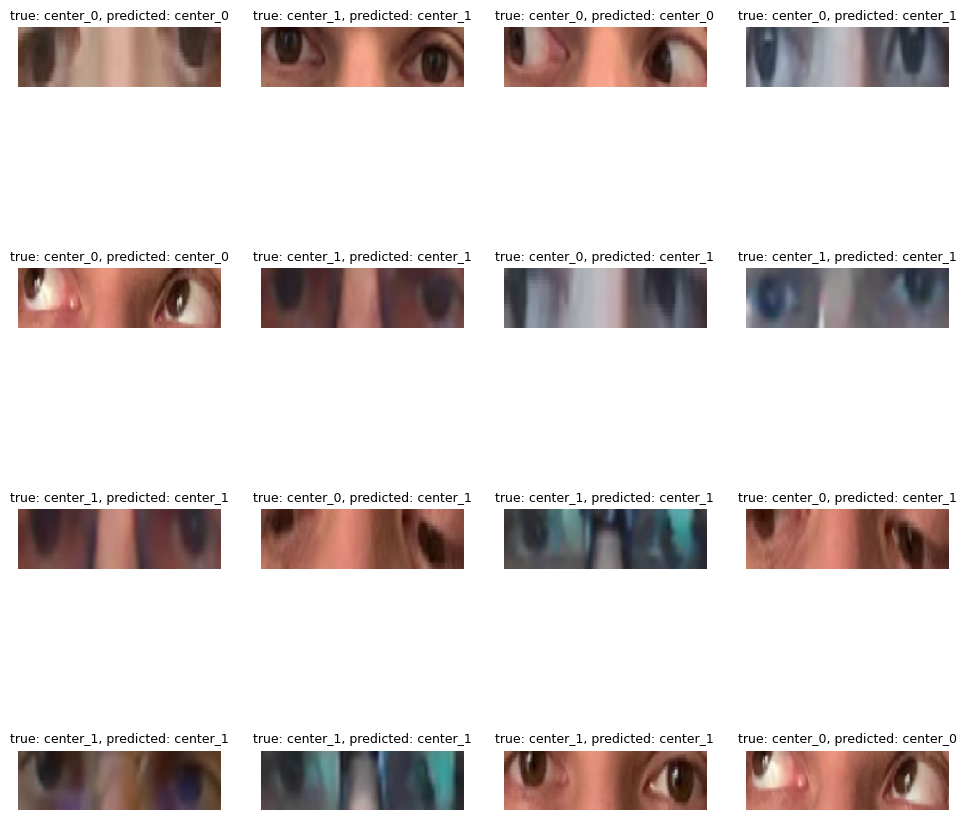

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(12,12))
  for n in range(16):
      ax = plt.subplot(4,4,n+1)
      plt.imshow(image_batch[n])
      pred = model_2_classes.predict(image_batch, verbose=0)
      #predicted_labels = (1 if pred >= 0.5 else 0)
      predicted_labels = (pred >= 0.5).astype(int)
      idx_pred = predicted_labels[n] # or True or False
      #print(pred, predicted_labels)
      #if idx_pred:
      #  class_pred = 1
      #else:
      #  class_pred = 0


      if label_batch[n] == 1:
        plt.title(f"true: {classnames[1]}, predicted: {classnames[int(idx_pred)]}", fontsize=9)
        plt.axis('off')
      else:
        plt.title(f"true: {classnames[0]}, predicted: {classnames[int(idx_pred)]}", fontsize=9)
        plt.axis('off')

image_batch, label_batch = next(test_generator)
show_batch(image_batch, label_batch)

# Pipeline testing...

In [ ]:
data_aug = False
target_size =(50, 170)
batch_size = 64

test2_path = "/content/eyes/pipeline_test/"

dataset = Dataset2Classes(train_path, val_path, test2_path, batch_size, target_size, data_aug, True)
_, _, test_generator = dataset.train_generator, dataset.val_generator, dataset.test_generator

Found 35533 images belonging to 2 classes.
Found 5567 images belonging to 2 classes.
Found 2620 images belonging to 2 classes.


In [ ]:
loss, acc = model_2_classes.evaluate(test_generator, verbose=1)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

41/41 [==============================] - 4s 107ms/step - loss: 0.7881 - accuracy: 0.8702
Test loss: 0.788112
Test accuracy: 0.870229
